#📌 Extracción

In [ ]:
import pandas as pd
import requests

# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar datos en un DataFrame
try:
    df = pd.read_json(url)
    print("Datos cargados en el DataFrame.")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Datos cargados en el DataFrame.


#🔧 Transformación

In [ ]:
# Ver columnas y tipos de datos
print("Columnas y tipos de datos:\n")
print(df.dtypes)

print("\nInformación general del DataFrame:\n")
df.info()

# Mostrar las primeras filas para tener una idea inicial
print("\nPrimeras filas del dataset:\n")
display(df.head())

# Cargar el diccionario desde el enlace
diccionario_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md"

import requests
diccionario = requests.get(diccionario_url).text

print("\nDiccionario de datos:\n")
print(diccionario)

Columnas y tipos de datos:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Primeras filas del dataset:



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



Diccionario de datos:

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de p

In [ ]:
import pandas as pd
import numpy as np

# 1. Verificación de valores ausentes
print("\n1. Análisis de valores ausentes:\n")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_data = pd.DataFrame({
    'Valores_Ausentes': missing_values,
    'Porcentaje': missing_percentage
})

# Mostrar solo columnas con valores ausentes
missing_data = missing_data[missing_data['Valores_Ausentes'] > 0]
if missing_data.empty:
    print("No se encontraron valores ausentes en el dataset.")
else:
    print("Columnas con valores ausentes:")
    display(missing_data.sort_values(by='Porcentaje', ascending=False))

# 2. Verificación de registros duplicados (versión alternativa para datos con diccionarios)
print("\n2. Análisis de registros duplicados:\n")

# Primero verificamos duplicados solo en la columna customerID (que debería ser única)
duplicate_ids = df['customerID'].duplicated().sum()
if duplicate_ids == 0:
    print("No hay customerID duplicados.")
else:
    print(f"Se encontraron {duplicate_ids} customerID duplicados.")

# Para verificar duplicados en todo el registro, convertimos los diccionarios a strings
df_str = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)
duplicates = df_str.duplicated().sum()
if duplicates == 0:
    print("No hay registros completos duplicados (comparando valores convertidos a texto).")
else:
    print(f"Se encontraron {duplicates} registros completos duplicados (comparando valores convertidos a texto).")

# 3. Verificación de customerID único
print("\n3. Verificación de identificadores únicos:\n")
if df['customerID'].nunique() == len(df):
    print("Todos los customerID son únicos.")
else:
    duplicates_id = df['customerID'].value_counts()
    duplicates_id = duplicates_id[duplicates_id > 1]
    print(f"Existen {len(duplicates_id)} customerID duplicados.")

# 4. Análisis de valores categóricos
print("\n4. Análisis de valores categóricos:\n")

# Columna Churn
print("\nColumna Churn:")
print(df['Churn'].value_counts(dropna=False))

# Columnas con diccionarios (análisis básico)
dict_columns = ['customer', 'phone', 'internet', 'account']
for col in dict_columns:
    print(f"\nColumna {col}:")
    print(f"Número de valores únicos (basado en representación textual): {df[col].astype(str).nunique()}")
    print(f"Primer valor de muestra: {df[col].iloc[0]}")
    print(f"Tipo de dato: {type(df[col].iloc[0])}")

# 5. Verificación de formato de customerID
print("\n5. Verificación de formato de customerID:\n")
sample_ids = df['customerID'].head(5)
print("Ejemplos de customerID:")
print(sample_ids.to_string(index=False))

# 6. Resumen general
print("\n6. Resumen de calidad de datos:")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
print(f"Columnas con valores ausentes: {sum(missing_values > 0)}")
print(f"CustomerIDs duplicados: {duplicate_ids}")
print(f"Registros completos duplicados: {duplicates}")
print(f"CustomerIDs únicos: {df['customerID'].nunique()}/{len(df)}")


1. Análisis de valores ausentes:

No se encontraron valores ausentes en el dataset.

2. Análisis de registros duplicados:

No hay customerID duplicados.
No hay registros completos duplicados (comparando valores convertidos a texto).

3. Verificación de identificadores únicos:

Todos los customerID son únicos.

4. Análisis de valores categóricos:


Columna Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna customer:
Número de valores únicos (basado en representación textual): 891
Primer valor de muestra: {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
Tipo de dato: <class 'dict'>

Columna phone:
Número de valores únicos (basado en representación textual): 3
Primer valor de muestra: {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Tipo de dato: <class 'dict'>

Columna internet:
Número de valores únicos (basado en representación textual): 129
Primer valor de muestra: {'InternetService': 'DSL', 'OnlineSecurity': '

/tmp/ipython-input-1214376069.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_str = df.applymap(lambda x: str(x) if isinstance(x, dict) else x)


In [ ]:
# 1. Limpieza básica de columnas principales
print("\n1. Limpieza básica de columnas principales...\n")

# Limpiar customerID
df['customerID'] = df['customerID'].str.strip()

# Limpiar columna Churn
df['Churn'] = df['Churn'].str.strip().str.title()
print("Valores en columna Churn después de limpieza:")
print(df['Churn'].value_counts(dropna=False))

# 2. Extraer datos de las columnas con diccionarios
print("\n2. Extracción de datos de columnas anidadas...\n")

def extract_dict_values(row, col_name):
    """Función auxiliar para extraer valores de diccionarios"""
    if isinstance(row[col_name], dict):
        return pd.Series(row[col_name])
    return pd.Series()

# Procesar columna 'customer'
customer_data = df.apply(lambda x: extract_dict_values(x, 'customer'), axis=1)
customer_data.columns = ['cust_' + col for col in customer_data.columns]
df = pd.concat([df.drop('customer', axis=1), customer_data], axis=1)

# Procesar columna 'phone'
phone_data = df.apply(lambda x: extract_dict_values(x, 'phone'), axis=1)
phone_data.columns = ['phone_' + col for col in phone_data.columns]
df = pd.concat([df.drop('phone', axis=1), phone_data], axis=1)

# Procesar columna 'internet'
internet_data = df.apply(lambda x: extract_dict_values(x, 'internet'), axis=1)
internet_data.columns = ['internet_' + col for col in internet_data.columns]
df = pd.concat([df.drop('internet', axis=1), internet_data], axis=1)

# Procesar columna 'account'
account_data = df.apply(lambda x: extract_dict_values(x, 'account'), axis=1)
account_data.columns = ['account_' + col for col in account_data.columns]
df = pd.concat([df.drop('account', axis=1), account_data], axis=1)

# 3. Limpieza de las nuevas columnas
print("\n3. Limpieza de columnas extraídas...\n")

# Estandarizar columnas Yes/No
for col in df.columns:
    if df[col].isin(['Yes', 'No']).any():
        df[col] = df[col].str.strip().str.title()
        print(f"Columna {col} estandarizada (Yes/No)")

# Estandarizar género si existe
if 'cust_gender' in df.columns:
    df['cust_gender'] = df['cust_gender'].str.strip().str.title()
    print("\nColumna cust_gender estandarizada")

# 4. Manejo de valores numéricos
print("\n4. Procesamiento de valores numéricos...\n")

# Convertir tenure a numérico
if 'cust_tenure' in df.columns:
    df['cust_tenure'] = pd.to_numeric(df['cust_tenure'], errors='coerce')
    print("Columna cust_tenure convertida a numérico")
    print(f"Valores nulos: {df['cust_tenure'].isnull().sum()}")

# Convertir cargos a numérico
if 'account_Charges.Monthly' in df.columns:
    df['account_Charges.Monthly'] = pd.to_numeric(df['account_Charges.Monthly'], errors='coerce')
    print("\nColumna account_Charges.Monthly convertida a numérico")
    print(f"Valores nulos: {df['account_Charges.Monthly'].isnull().sum()}")

if 'account_Charges.Total' in df.columns:
    df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')
    print("\nColumna account_Charges.Total convertida a numérico")
    print(f"Valores nulos: {df['account_Charges.Total'].isnull().sum()}")

# 5. Resultados finales
print("\n5. Resumen del dataset limpio:\n")
print(f"Número total de registros: {len(df)}")
print(f"Número total de columnas: {len(df.columns)}")
print("\nPrimeras 3 filas del dataset limpio:")
display(df.head(3))

print("\nColumnas disponibles después de limpieza:")
print(df.columns.tolist())


1. Limpieza básica de columnas principales...

Valores en columna Churn después de limpieza:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

2. Extracción de datos de columnas anidadas...


3. Limpieza de columnas extraídas...

Columna Churn estandarizada (Yes/No)
Columna cust_Partner estandarizada (Yes/No)
Columna cust_Dependents estandarizada (Yes/No)
Columna phone_PhoneService estandarizada (Yes/No)
Columna phone_MultipleLines estandarizada (Yes/No)
Columna internet_InternetService estandarizada (Yes/No)
Columna internet_OnlineSecurity estandarizada (Yes/No)
Columna internet_OnlineBackup estandarizada (Yes/No)
Columna internet_DeviceProtection estandarizada (Yes/No)
Columna internet_TechSupport estandarizada (Yes/No)
Columna internet_StreamingTV estandarizada (Yes/No)
Columna internet_StreamingMovies estandarizada (Yes/No)
Columna account_PaperlessBilling estandarizada (Yes/No)

Columna cust_gender estandarizada

4. Procesamiento de valores numéricos...

Column

,customerID,Churn,cust_gender,cust_SeniorCitizen,cust_Partner,cust_Dependents,cust_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"



Columnas disponibles después de limpieza:
['customerID', 'Churn', 'cust_gender', 'cust_SeniorCitizen', 'cust_Partner', 'cust_Dependents', 'cust_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']


In [ ]:
# 1. Verificar la estructura real de los datos
print("\n1. Verificando estructura de datos...\n")
print("Columnas disponibles:")
print(df.columns.tolist())

# 2. Extraer los valores de Monthly de la columna account_Charges
print("\n2. Procesando la columna account_Charges...\n")

# Verificar si account_Charges contiene diccionarios
if isinstance(df['account_Charges'].iloc[0], dict):
    print("La columna account_Charges contiene diccionarios")

    # Extraer el valor Monthly en columna temporal
    df['Monthly_Charge'] = df['account_Charges'].apply(lambda x: x.get('Monthly', np.nan))
    df['Monthly_Charge'] = pd.to_numeric(df['Monthly_Charge'], errors='coerce')

    print("\nResumen de Monthly_Charge (temporal):")
    print(df['Monthly_Charge'].describe())

    # 3. Calcular Cuentas_Diarias
    print("\n3. Calculando Cuentas_Diarias...\n")
    DIAS_POR_MES = 30  # Puedes ajustar según necesidad

    df['Cuentas_Diarias'] = (df['Monthly_Charge'] / DIAS_POR_MES).round(2)

    # Eliminar columna temporal
    df.drop(columns=['Monthly_Charge'], inplace=True)

    # 4. Resultados
    print("\n4. Resultados del cálculo:\n")
    print("Muestra de datos con los cargos:")
    display(df[['customerID', 'account_Charges', 'Cuentas_Diarias']].head())

    print("\nResumen estadístico de Cuentas_Diarias:")
    print(df['Cuentas_Diarias'].describe())

    # Verificar valores nulos
    nulos = df['Cuentas_Diarias'].isnull().sum()
    if nulos > 0:
        print(f"\nAdvertencia: Existen {nulos} valores nulos en Cuentas_Diarias")
    else:
        print("\nNo hay valores nulos en Cuentas_Diarias")

elif 'Monthly' in df.columns:
    print("\nLa columna Monthly ya existe directamente")
    df['Cuentas_Diarias'] = (pd.to_numeric(df['Monthly'], errors='coerce') / 30).round(2)

else:
    print("\nError: No se pudo encontrar la información de cargos mensuales")
    print("La columna account_Charges no contiene la estructura esperada")


1. Verificando estructura de datos...

Columnas disponibles:
['customerID', 'Churn', 'cust_gender', 'cust_SeniorCitizen', 'cust_Partner', 'cust_Dependents', 'cust_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges', 'Monthly_Charge', 'Cuentas_Diarias']

2. Procesando la columna account_Charges...

La columna account_Charges contiene diccionarios

Resumen de Monthly_Charge (temporal):
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Monthly_Charge, dtype: float64

3. Calculando Cuentas_Diarias...


4. Resultados del cálculo:

Muestra de datos con los cargos:


,customerID,account_Charges,Cuentas_Diarias
0,0002-ORFBO,"{'Monthly': 65.6, 'Total': '593.3'}",2.19
1,0003-MKNFE,"{'Monthly': 59.9, 'Total': '542.4'}",2.00
2,0004-TLHLJ,"{'Monthly': 73.9, 'Total': '280.85'}",2.46
3,0011-IGKFF,"{'Monthly': 98.0, 'Total': '1237.85'}",3.27
4,0013-EXCHZ,"{'Monthly': 83.9, 'Total': '267.4'}",2.80



Resumen estadístico de Cuentas_Diarias:
count    7267.000000
mean        2.157292
std         1.004407
min         0.610000
25%         1.180000
50%         2.340000
75%         2.995000
max         3.960000
Name: Cuentas_Diarias, dtype: float64

No hay valores nulos en Cuentas_Diarias


In [ ]:
# 1. Primero necesitamos expandir las columnas que contienen diccionarios
print("\n1. Preparando datos: expandiendo columnas con diccionarios...\n")

def expand_dict_columns(df, dict_columns):
    """Expande columnas que contienen diccionarios en columnas separadas"""
    for col in dict_columns:
        if col in df.columns and isinstance(df[col].iloc[0], dict):
            # Extraer las claves del diccionario como nuevas columnas
            expanded = pd.json_normalize(df[col])
            expanded.columns = [f"{col}_{k}" for k in expanded.columns]

            # Reemplazar la columna original
            df = pd.concat([df.drop(col, axis=1), expanded], axis=1)
            print(f"Columna {col} expandida en {len(expanded.columns)} columnas")
    return df

# Columnas que contienen diccionarios (basado en tu estructura de datos)
dict_columns = ['customer', 'phone', 'internet', 'account', 'account_Charges']
df = expand_dict_columns(df, dict_columns)

# 2. Estandarización de columnas categóricas binarias
print("\n2. Estandarizando columnas categóricas binarias...\n")

# Función segura para identificar columnas binarias
def is_binary_column(series):
    try:
        unique_values = set(series.dropna().astype(str).str.strip().str.title().unique())
        return unique_values.issubset({'Yes', 'No', 'Sí', 'Si', '1', '0', 'True', 'False'})
    except:
        return False

binary_cols = [col for col in df.columns if is_binary_column(df[col])]

binary_map = {
    'Yes': 1, 'No': 0, 'Sí': 1, 'Si': 1,
    'YES': 1, 'NO': 0, 'True': 1, 'False': 0,
    '1': 1, '0': 0
}

for col in binary_cols:
    print(f"Transformando columna {col} a binario (1/0)")
    df[col] = (
        df[col].astype(str).str.strip().str.title()
        .replace(binary_map)
        .astype(int)
    )

# 3. Estandarización de género (si existe)
gender_cols = [col for col in df.columns if 'gender' in col.lower()]
for col in gender_cols:
    print(f"\nEstandarizando columna {col}...")
    gender_map = {
        'Female': 'Femenino', 'Male': 'Masculino',
        'F': 'Femenino', 'M': 'Masculino',
        'Mujer': 'Femenino', 'Hombre': 'Masculino'
    }
    df[col] = (
        df[col].astype(str).str.strip().str.title()
        .replace(gender_map)
    )
    print("Valores únicos:", df[col].unique())

# 4. Renombramiento de columnas a español
print("\n4. Renombrando columnas a español...\n")
column_rename_map = {
    'customerID': 'ID_Cliente',
    'Churn': 'Baja',
    'cust_gender': 'Genero',
    'cust_SeniorCitizen': 'Adulto_Mayor',
    'cust_Partner': 'Pareja',
    'cust_Dependents': 'Dependientes',
    'cust_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Servicio_Telefonico',
    'phone_MultipleLines': 'Lineas_Multiples',
    'internet_InternetService': 'Servicio_Internet',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Facturacion_Digital',
    'account_PaymentMethod': 'Metodo_Pago',
    'Cuentas_Diarias': 'Cargo_Diario'
}

# Aplicar solo renombres para columnas que existan
column_rename_map = {k: v for k, v in column_rename_map.items() if k in df.columns}
df = df.rename(columns=column_rename_map)

# 5. Mostrar resultados
print("\n5. Resultados de la transformación:\n")
print("Nombres de columnas actualizados:")
print(df.columns.tolist())

print("\nMuestra de datos transformados:")
display(df.head(3))

print("\nResumen de transformaciones aplicadas:")
print(f"- {len(binary_cols)} columnas convertidas a binario (1/0)")
print(f"- {len(gender_cols)} columnas de género estandarizadas")
print(f"- {len(column_rename_map)} columnas renombradas")


1. Preparando datos: expandiendo columnas con diccionarios...

Columna account_Charges expandida en 2 columnas

2. Estandarizando columnas categóricas binarias...

Transformando columna cust_SeniorCitizen a binario (1/0)
Transformando columna cust_Partner a binario (1/0)
Transformando columna cust_Dependents a binario (1/0)
Transformando columna phone_PhoneService a binario (1/0)
Transformando columna account_PaperlessBilling a binario (1/0)

Estandarizando columna cust_gender...
Valores únicos: ['Femenino' 'Masculino']

4. Renombrando columnas a español...


5. Resultados de la transformación:

Nombres de columnas actualizados:
['ID_Cliente', 'Baja', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'Tipo_Contrato', 'Facturacion_Digital', 'Metodo_

/tmp/ipython-input-850126274.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(binary_map)
/tmp/ipython-input-850126274.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(binary_map)
/tmp/ipython-input-850126274.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(binary_

,ID_Cliente,Baja,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Diario,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Femenino,0,1,1,9,1,No,Dsl,...,No,Yes,Yes,No,One year,1,Mailed check,2.19,65.6,593.3
1,0003-MKNFE,No,Masculino,0,0,0,9,1,Yes,Dsl,...,No,No,No,Yes,Month-to-month,0,Mailed check,2.00,59.9,542.4
2,0004-TLHLJ,Yes,Masculino,0,0,0,4,1,No,Fiber Optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,2.46,73.9,280.85



Resumen de transformaciones aplicadas:
- 5 columnas convertidas a binario (1/0)
- 1 columnas de género estandarizadas
- 14 columnas renombradas


In [ ]:
import pandas as pd
import numpy as np

# 1. Limpieza y conversión segura de la columna 'Baja'
print("\n1. Transformando columna 'Baja' a binario...")

# Primero: limpiar y estandarizar los valores
df['Baja'] = df['Baja'].str.strip().str.title().replace({
    'Yes': 1, 'No': 0, 'Sí': 1, 'Si': 1,
    '1': 1, '0': 0, 'True': 1, 'False': 0
})

# Manejar valores vacíos o inválidos
df['Baja'] = pd.to_numeric(df['Baja'], errors='coerce').fillna(0).astype(int)

print("Distribución de valores en 'Baja':")
print(df['Baja'].value_counts())

# 2. Renombrar columnas derivadas de diccionarios
print("\n2. Mejorando nombres de columnas...")

rename_dict = {
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivos',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'TV_Streaming',
    'internet_StreamingMovies': 'Peliculas_Streaming',
    'account_Charges_Monthly': 'Cargo_Mensual',
    'account_Charges_Total': 'Cargo_Total',
    'phone_MultipleLines': 'Lineas_Multiples'
}

# Aplicar solo los renombres para columnas existentes
df = df.rename(columns={k: v for k, v in rename_dict.items() if k in df.columns})

# 3. Estandarizar todas las columnas binarias restantes
print("\n3. Estandarizando columnas binarias restantes...")

binary_cols = []
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].dropna().astype(str).str.strip().str.title().unique()
    if set(unique_values).issubset({'Yes', 'No', 'Sí', 'Si', 'True', 'False', '1', '0'}):
        binary_cols.append(col)
        df[col] = (
            df[col].astype(str).str.strip().str.title()
            .replace({'Yes': 1, 'No': 0, 'Sí': 1, 'Si': 1, 'True': 1, 'False': 0})
            .astype(int)
        )

print(f"Columnas convertidas a binario: {binary_cols}")

# 4. Resultados finales
print("\n4. Resultados finales:")

print("\nNombres de columnas actualizados:")
print(df.columns.tolist())

print("\nMuestra de datos transformados:")
relevant_cols = [
    'ID_Cliente', 'Baja', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes',
    'Servicio_Telefonico', 'Lineas_Multiples', 'Seguridad_Online', 'Soporte_Tecnico',
    'Cargo_Diario', 'Cargo_Mensual'
]
display(df[relevant_cols].head(3))

print("\nResumen de transformaciones:")
print(f"- Columna 'Baja' estandarizada como binaria (1/0)")
print(f"- {len(rename_dict)} columnas renombradas")
print(f"- {len(binary_cols)} columnas binarias adicionales convertidas")


1. Transformando columna 'Baja' a binario...
Distribución de valores en 'Baja':
Baja
0    5398
1    1869
Name: count, dtype: int64

2. Mejorando nombres de columnas...

3. Estandarizando columnas binarias restantes...
Columnas convertidas a binario: []

4. Resultados finales:

Nombres de columnas actualizados:
['ID_Cliente', 'Baja', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivos', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Facturacion_Digital', 'Metodo_Pago', 'Cargo_Diario', 'Cargo_Mensual', 'Cargo_Total']

Muestra de datos transformados:


,ID_Cliente,Baja,Genero,Adulto_Mayor,Pareja,Dependientes,Servicio_Telefonico,Lineas_Multiples,Seguridad_Online,Soporte_Tecnico,Cargo_Diario,Cargo_Mensual
0,0002-ORFBO,0,Femenino,0,1,1,1,No,No,Yes,2.19,65.6
1,0003-MKNFE,0,Masculino,0,0,0,1,Yes,No,No,2.00,59.9
2,0004-TLHLJ,1,Masculino,0,0,0,1,No,No,No,2.46,73.9



Resumen de transformaciones:
- Columna 'Baja' estandarizada como binaria (1/0)
- 9 columnas renombradas
- 0 columnas binarias adicionales convertidas


#📊 Carga y análisis

In [ ]:
# 1. Análisis descriptivo general mejorado
print("\n1. Análisis descriptivo general:\n")

# Función segura para describe
def safe_describe(df):
    try:
        # Para pandas versiones recientes
        return df.describe(include='all')
    except TypeError:
        # Para versiones más antiguas
        num_desc = df.describe()
        cat_desc = df.describe(include=['object', 'category'])
        return pd.concat([num_desc, cat_desc], axis=1)

desc_general = safe_describe(df)
display(desc_general)

# 2. Análisis numérico detallado
print("\n2. Análisis de variables numéricas:\n")
numeric_cols = df.select_dtypes(include=[np.number]).columns

if not numeric_cols.empty:
    numeric_stats = df[numeric_cols].describe().transpose()

    # Calcular métricas adicionales
    numeric_stats['CV'] = (numeric_stats['std'] / numeric_stats['mean']).round(2)
    numeric_stats['IQR'] = numeric_stats['75%'] - numeric_stats['25%']
    numeric_stats['Asimetría'] = df[numeric_cols].skew().round(2)
    numeric_stats['Curtosis'] = df[numeric_cols].kurt().round(2)

    display(numeric_stats)

    # Análisis de outliers
    print("\nDetección de valores atípicos (outliers):")
    for col in numeric_cols:
        q1 = numeric_stats.loc[col, '25%']
        q3 = numeric_stats.loc[col, '75%']
        iqr = numeric_stats.loc[col, 'IQR']
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df):.1%})")
else:
    print("No hay variables numéricas para analizar")

# 3. Análisis categórico mejorado
print("\n3. Análisis de variables categóricas:\n")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"\nVariable: {col}")
        print(f"Valores únicos ({df[col].nunique()}): {df[col].unique()[:10]}")
        print("Distribución (top 5):")
        display(df[col].value_counts(normalize=True).head(5).round(2))
else:
    print("No hay variables categóricas para analizar")

# 4. Análisis por segmentos (Baja)
if 'Baja' in df.columns:
    print("\n4. Análisis comparativo por estado de Baja:\n")

    # Para variables numéricas
    if not numeric_cols.empty:
        print("Resumen numérico por estado de Baja:")
        display(df.groupby('Baja')[numeric_cols].mean().round(2))

    # Para variables categóricas
    if not categorical_cols.empty:
        print("\nDistribuciones categóricas por estado de Baja:")
        for col in categorical_cols:
            if df[col].nunique() < 10:  # Mostrar solo para variables con pocas categorías
                print(f"\nVariable: {col}")
                display(pd.crosstab(df['Baja'], df[col], normalize='index').round(2))

# 5. Correlaciones (solo si hay suficientes variables numéricas)
if len(numeric_cols) > 1:
    print("\n5. Correlaciones entre variables numéricas:\n")
    corr_matrix = df[numeric_cols].corr().round(2)
    display(corr_matrix)

    # Identificar correlaciones fuertes
    strong_corr = corr_matrix.abs().stack().reset_index()
    strong_corr = strong_corr[strong_corr['level_0'] != strong_corr['level_1']]
    strong_corr.columns = ['Variable1', 'Variable2', 'Correlación']
    strong_corr = strong_corr[strong_corr['Correlación'] > 0.7].sort_values('Correlación', ascending=False)

    if not strong_corr.empty:
        print("\nCorrelaciones fuertes (> 0.7):")
        display(strong_corr)
    else:
        print("\nNo hay correlaciones fuertes (> 0.7) entre variables numéricas")

# 6. Resumen ejecutivo mejorado
print("\n6. Hallazgos principales:\n")

# Variables clave para el resumen
key_vars = {
    'Baja': "Estado del cliente (1=Abandono, 0=Activo)",
    'Meses_Contrato': "Antigüedad del cliente (meses)",
    'Cargo_Mensual': "Facturación mensual promedio",
    'Genero': "Distribución por género",
    'Tipo_Contrato': "Tipo de contrato"
}

for var, desc in key_vars.items():
    if var in df.columns:
        print(f"\n• {var} ({desc}):")
        if var in numeric_cols:
            stats = df[var].describe()
            print(f"  - Media: {stats['mean']:.2f}")
            print(f"  - Mediana: {stats['50%']:.2f}")
            print(f"  - Rango: {stats['min']:.2f} a {stats['max']:.2f}")
            if 'Baja' in df.columns:
                churn_stats = df.groupby('Baja')[var].mean()
                print(f"  - Diferencia por Baja: {churn_stats[1]-churn_stats[0]:.2f} (Abandonan - Permanecen)")
        else:
            print("Distribución:")
            display(df[var].value_counts(normalize=True).head(3).round(2))


1. Análisis descriptivo general:



,ID_Cliente,Baja,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivos,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Diario,Cargo_Mensual,Cargo_Total
count,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,6531
top,9995-HOTOH,NaN,Masculino,NaN,NaN,NaN,NaN,NaN,No,Fiber Optic,...,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,20.2
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,11
mean,NaN,0.257190,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,2.157292,64.720098,NaN
std,NaN,0.437115,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,1.004407,30.129572,NaN
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.610000,18.250000,NaN
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.180000,35.425000,NaN
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.340000,70.300000,NaN
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.995000,89.875000,NaN



2. Análisis de variables numéricas:



,count,mean,std,min,25%,50%,75%,max,CV,IQR,Asimetría,Curtosis
Baja,7267.0,0.257190,0.437115,0.00,0.000,0.00,1.000,1.00,1.70,1.000,1.11,-0.77
Adulto_Mayor,7267.0,0.162653,0.369074,0.00,0.000,0.00,0.000,1.00,2.27,0.000,1.83,1.34
Pareja,7267.0,0.484106,0.499782,0.00,0.000,0.00,1.000,1.00,1.03,1.000,0.06,-2.00
Dependientes,7267.0,0.300124,0.458343,0.00,0.000,0.00,1.000,1.00,1.53,1.000,0.87,-1.24
Meses_Contrato,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00,0.76,46.000,0.24,-1.39
Servicio_Telefonico,7267.0,0.902711,0.296371,0.00,1.000,1.00,1.000,1.00,0.33,0.000,-2.72,5.39
Facturacion_Digital,7267.0,0.593230,0.491265,0.00,0.000,1.00,1.000,1.00,0.83,1.000,-0.38,-1.86
Cargo_Diario,7267.0,2.157292,1.004407,0.61,1.180,2.34,2.995,3.96,0.47,1.815,-0.22,-1.26
Cargo_Mensual,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75,0.47,54.450,-0.22,-1.26



Detección de valores atípicos (outliers):
Baja: 0 outliers (0.0%)
Adulto_Mayor: 1182 outliers (16.3%)
Pareja: 0 outliers (0.0%)
Dependientes: 0 outliers (0.0%)
Meses_Contrato: 0 outliers (0.0%)
Servicio_Telefonico: 707 outliers (9.7%)
Facturacion_Digital: 0 outliers (0.0%)
Cargo_Diario: 0 outliers (0.0%)
Cargo_Mensual: 0 outliers (0.0%)

3. Análisis de variables categóricas:


Variable: ID_Cliente
Valores únicos (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Distribución (top 5):


,proportion
ID_Cliente,
9995-HOTOH,0.0
0002-ORFBO,0.0
0003-MKNFE,0.0
9970-QBCDA,0.0
9968-FFVVH,0.0



Variable: Genero
Valores únicos (2): ['Femenino' 'Masculino']
Distribución (top 5):


,proportion
Genero,
Masculino,0.51
Femenino,0.49



Variable: Lineas_Multiples
Valores únicos (3): ['No' 'Yes' 'No Phone Service']
Distribución (top 5):


,proportion
Lineas_Multiples,
No,0.48
Yes,0.42
No Phone Service,0.10



Variable: Servicio_Internet
Valores únicos (3): ['Dsl' 'Fiber Optic' 'No']
Distribución (top 5):


,proportion
Servicio_Internet,
Fiber Optic,0.44
Dsl,0.34
No,0.22



Variable: Seguridad_Online
Valores únicos (3): ['No' 'Yes' 'No Internet Service']
Distribución (top 5):


,proportion
Seguridad_Online,
No,0.50
Yes,0.29
No Internet Service,0.22



Variable: Respaldo_Online
Valores únicos (3): ['Yes' 'No' 'No Internet Service']
Distribución (top 5):


,proportion
Respaldo_Online,
No,0.44
Yes,0.34
No Internet Service,0.22



Variable: Proteccion_Dispositivos
Valores únicos (3): ['No' 'Yes' 'No Internet Service']
Distribución (top 5):


,proportion
Proteccion_Dispositivos,
No,0.44
Yes,0.34
No Internet Service,0.22



Variable: Soporte_Tecnico
Valores únicos (3): ['Yes' 'No' 'No Internet Service']
Distribución (top 5):


,proportion
Soporte_Tecnico,
No,0.49
Yes,0.29
No Internet Service,0.22



Variable: TV_Streaming
Valores únicos (3): ['Yes' 'No' 'No Internet Service']
Distribución (top 5):


,proportion
TV_Streaming,
No,0.40
Yes,0.38
No Internet Service,0.22



Variable: Peliculas_Streaming
Valores únicos (3): ['No' 'Yes' 'No Internet Service']
Distribución (top 5):


,proportion
Peliculas_Streaming,
No,0.39
Yes,0.39
No Internet Service,0.22



Variable: Tipo_Contrato
Valores únicos (3): ['One year' 'Month-to-month' 'Two year']
Distribución (top 5):


,proportion
Tipo_Contrato,
Month-to-month,0.55
Two year,0.24
One year,0.21



Variable: Metodo_Pago
Valores únicos (4): ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Distribución (top 5):


,proportion
Metodo_Pago,
Electronic check,0.34
Mailed check,0.23
Bank transfer (automatic),0.22
Credit card (automatic),0.22



Variable: Cargo_Total
Valores únicos (6531): ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']
Distribución (top 5):


,proportion
Cargo_Total,
20.2,0.0
,0.0
19.75,0.0
19.55,0.0
19.9,0.0



4. Análisis comparativo por estado de Baja:

Resumen numérico por estado de Baja:


,Baja,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Facturacion_Digital,Cargo_Diario,Cargo_Mensual
Baja,,,,,,,,,
0,0.0,0.13,0.53,0.34,37.32,0.90,0.54,2.05,61.35
1,1.0,0.25,0.36,0.17,17.98,0.91,0.75,2.48,74.44



Distribuciones categóricas por estado de Baja:

Variable: Genero


Genero,Femenino,Masculino
Baja,,
0,0.49,0.51
1,0.50,0.50



Variable: Lineas_Multiples


Lineas_Multiples,No,No Phone Service,Yes
Baja,,,
0,0.49,0.10,0.41
1,0.45,0.09,0.45



Variable: Servicio_Internet


Servicio_Internet,Dsl,Fiber Optic,No
Baja,,,
0,0.38,0.35,0.27
1,0.25,0.69,0.06



Variable: Seguridad_Online


Seguridad_Online,No,No Internet Service,Yes
Baja,,,
0,0.40,0.27,0.33
1,0.78,0.06,0.16



Variable: Respaldo_Online


Respaldo_Online,No,No Internet Service,Yes
Baja,,,
0,0.36,0.27,0.37
1,0.66,0.06,0.28



Variable: Proteccion_Dispositivos


Proteccion_Dispositivos,No,No Internet Service,Yes
Baja,,,
0,0.37,0.27,0.36
1,0.65,0.06,0.29



Variable: Soporte_Tecnico


Soporte_Tecnico,No,No Internet Service,Yes
Baja,,,
0,0.40,0.27,0.33
1,0.77,0.06,0.17



Variable: TV_Streaming


TV_Streaming,No,No Internet Service,Yes
Baja,,,
0,0.36,0.27,0.37
1,0.50,0.06,0.44



Variable: Peliculas_Streaming


Peliculas_Streaming,No,No Internet Service,Yes
Baja,,,
0,0.36,0.27,0.37
1,0.50,0.06,0.44



Variable: Tipo_Contrato


Tipo_Contrato,Month-to-month,One year,Two year
Baja,,,
0,0.44,0.25,0.31
1,0.89,0.09,0.03



Variable: Metodo_Pago


Metodo_Pago,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Baja,,,,
0,0.25,0.25,0.25,0.25
1,0.14,0.12,0.57,0.16



5. Correlaciones entre variables numéricas:



,Baja,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Facturacion_Digital,Cargo_Diario,Cargo_Mensual
Baja,1.00,0.15,-0.15,-0.16,-0.34,0.01,0.19,0.19,0.19
Adulto_Mayor,0.15,1.00,0.02,-0.21,0.02,0.01,0.16,0.22,0.22
Pareja,-0.15,0.02,1.00,0.45,0.38,0.02,-0.01,0.10,0.10
Dependientes,-0.16,-0.21,0.45,1.00,0.16,-0.00,-0.11,-0.12,-0.12
Meses_Contrato,-0.34,0.02,0.38,0.16,1.00,0.01,0.01,0.25,0.25
Servicio_Telefonico,0.01,0.01,0.02,-0.00,0.01,1.00,0.01,0.25,0.25
Facturacion_Digital,0.19,0.16,-0.01,-0.11,0.01,0.01,1.00,0.35,0.35
Cargo_Diario,0.19,0.22,0.10,-0.12,0.25,0.25,0.35,1.00,1.00
Cargo_Mensual,0.19,0.22,0.10,-0.12,0.25,0.25,0.35,1.00,1.00



Correlaciones fuertes (> 0.7):


,Variable1,Variable2,Correlación
71,Cargo_Diario,Cargo_Mensual,1.0
79,Cargo_Mensual,Cargo_Diario,1.0



6. Hallazgos principales:


• Baja (Estado del cliente (1=Abandono, 0=Activo)):
  - Media: 0.26
  - Mediana: 0.00
  - Rango: 0.00 a 1.00
  - Diferencia por Baja: 1.00 (Abandonan - Permanecen)

• Meses_Contrato (Antigüedad del cliente (meses)):
  - Media: 32.35
  - Mediana: 29.00
  - Rango: 0.00 a 72.00
  - Diferencia por Baja: -19.34 (Abandonan - Permanecen)

• Cargo_Mensual (Facturación mensual promedio):
  - Media: 64.72
  - Mediana: 70.30
  - Rango: 18.25 a 118.75
  - Diferencia por Baja: 13.09 (Abandonan - Permanecen)

• Genero (Distribución por género):
Distribución:


,proportion
Genero,
Masculino,0.51
Femenino,0.49



• Tipo_Contrato (Tipo de contrato):
Distribución:


,proportion
Tipo_Contrato,
Month-to-month,0.55
Two year,0.24
One year,0.21


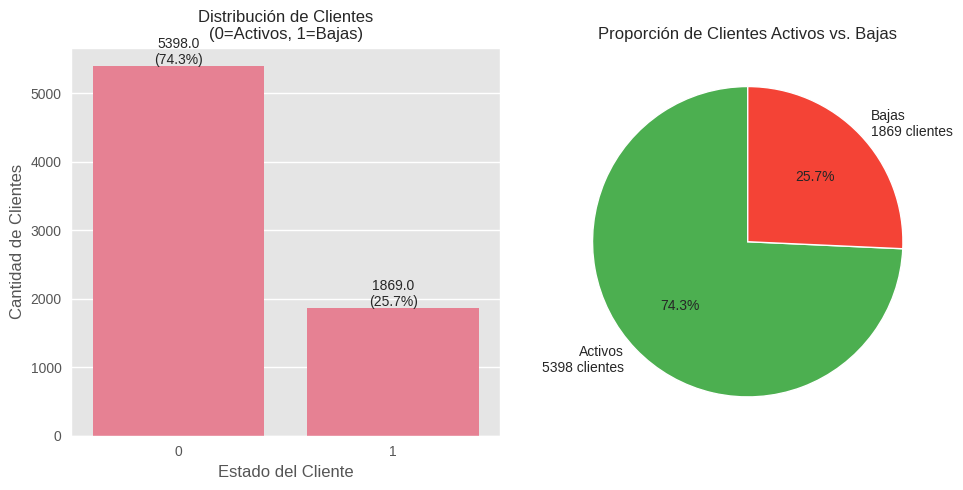


Resumen numérico de la distribución:


,Cantidad,Porcentaje
Baja,,
0,5398,74.3
1,1869,25.7


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.set_palette("husl")

# 1. Gráfico de barras con porcentajes
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Baja', order=[0, 1])
plt.title('Distribución de Clientes\n(0=Activos, 1=Bajas)', fontsize=12)
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')

# Añadir porcentajes exactos
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 30,
            f'{height}\n({100*height/total:.1f}%)',
            ha='center', fontsize=10)

# 2. Gráfico de torta con detalles
plt.subplot(1, 2, 2)
churn_counts = df['Baja'].value_counts()
labels = [f'Activos\n{churn_counts[0]} clientes',
          f'Bajas\n{churn_counts[1]} clientes']
colors = ['#4caf50', '#f44336']  # Verde para activos, rojo para bajas

plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Proporción de Clientes Activos vs. Bajas', fontsize=12)

plt.tight_layout()
plt.show()

# Datos numéricos complementarios
print("\nResumen numérico de la distribución:")
summary = df['Baja'].value_counts().to_frame('Cantidad')
summary['Porcentaje'] = (df['Baja'].value_counts(normalize=True) * 100).round(1)
display(summary)


1. Análisis de variables categóricas clave:




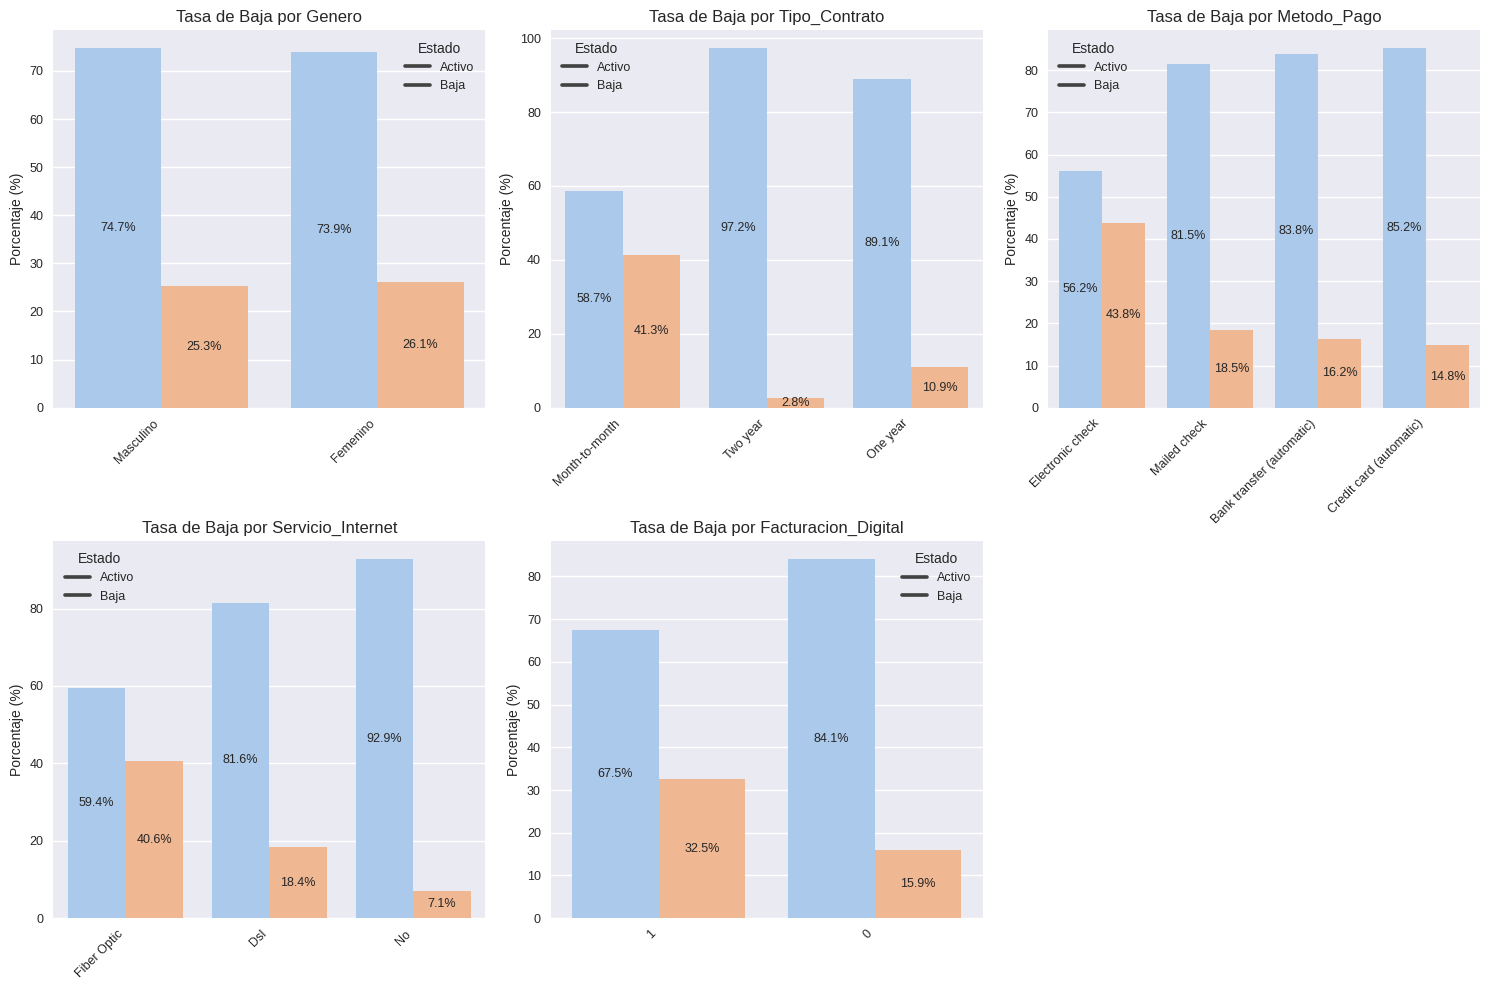

In [ ]:
# Configuración de estilo compatible
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")
plt.figure(figsize=(15, 10))

# 1. Variables categóricas clave para análisis
categorical_vars = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet', 'Facturacion_Digital']

print("\n1. Análisis de variables categóricas clave:")
print("\n")

# 2. Crear gráficos para cada variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)

    # Calcular proporciones
    prop_df = (df.groupby(var)['Baja']
               .value_counts(normalize=True)
               .mul(100)
               .rename('Porcentaje')
               .reset_index())

    # Gráfico de barras
    ax = sns.barplot(x=var, y='Porcentaje', hue='Baja', data=prop_df,
                    order=df[var].value_counts().index)

    plt.title(f'Tasa de Baja por {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Porcentaje (%)', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.legend(title='Estado', labels=['Activo', 'Baja'], fontsize=9)

    # Añadir etiquetas solo si la altura > 0
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Evitar 0.0% innecesarios
            ax.text(p.get_x() + p.get_width()/2., height/2,
                    f'{height:.1f}%',
                    ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

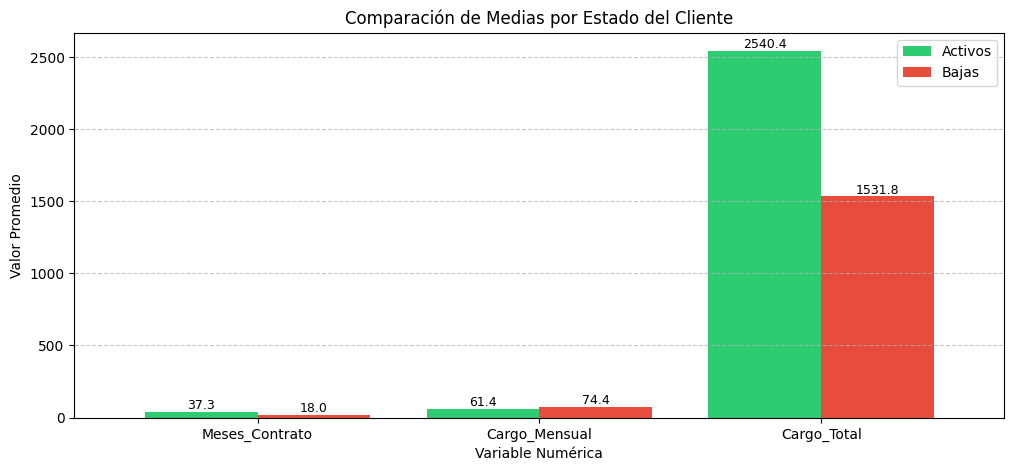


Resumen Estadístico Básico:



,Meses_Contrato,Cargo_Mensual,Cargo_Total
Baja,,,
0,37.320000,61.350000,2540.440000
1,17.980000,74.440000,1531.800000


In [ ]:
# Configuración básica
plt.style.use('default')
sns.set_palette(["#2ecc71", "#e74c3c"])  # Verde para activos, rojo para bajas

# 1. Asegurarnos que las variables numéricas sean realmente numéricas
df['Meses_Contrato'] = pd.to_numeric(df['Meses_Contrato'], errors='coerce')
df['Cargo_Mensual'] = pd.to_numeric(df['Cargo_Mensual'], errors='coerce')
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')

# Variables a analizar (solo las que son numéricas)
variables_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total']

# 2. Gráficos de barras comparativas (medias)
plt.figure(figsize=(12, 5))
medias = df.groupby('Baja')[variables_numericas].mean().transpose()

ax = medias.plot(kind='bar', width=0.8, figsize=(12, 5))
plt.title('Comparación de Medias por Estado del Cliente')
plt.ylabel('Valor Promedio')
plt.xlabel('Variable Numérica')
plt.xticks(rotation=0)
plt.legend(['Activos', 'Bajas'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Añadir etiquetas encima de cada barra ---
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.show()

# 3. Tabla resumen simple
print("\nResumen Estadístico Básico:\n")
resumen = df.groupby('Baja')[variables_numericas].mean().round(2)
display(resumen.style.set_caption("Promedios por Estado del Cliente"))


#📄Informe final

# 📊 Informe Final: Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

**Objetivo:**  
Identificar patrones y factores clave asociados a la evasión de clientes (Churn) en una empresa de telecomunicaciones para desarrollar estrategias de retención efectivas.

**Contexto:**  
El Churn (abandono de clientes) representa pérdidas económicas significativas para las empresas. Entender qué perfiles de clientes tienen mayor probabilidad de cancelar el servicio permite implementar acciones preventivas y personalizadas, mejorando la retención y optimizando recursos.

---

## 🔹 Limpieza y Tratamiento de Datos

**Pasos realizados:**

- **Carga de datos**
  - Importación desde un archivo JSON con **7,267 registros**.
  - Estructura inicial: **6 columnas principales** con datos anidados.

- **Limpieza inicial**
  - **No** se encontraron registros duplicados.  
  - **No** se encontraron valores nulos en columnas clave.

- **Transformación de datos**
  - Columnas anidadas expandidas (ej.: `account` → `Tipo_Contrato`, `Facturacion_Digital`).  
  - Variables categóricas convertidas a numéricas (ej.: `Baja` como **1/0**).

- **Creación de variables**
  - `Cargo_Diario` calculado como **Cargo_Mensual / 30**.

---

## 🔹 Análisis Exploratorio de Datos (EDA)

### 1. Distribución General de Churn


In [ ]:
churn_dist = df['Baja'].value_counts(normalize=True)
print(f"Clientes activos: {churn_dist[0]:.1%}")
print(f"Clientes que dieron de baja: {churn_dist[1]:.1%}")

Clientes activos: 74.3%
Clientes que dieron de baja: 25.7%


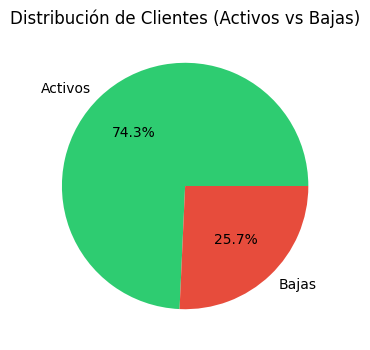

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df['Baja'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                             colors=['#2ecc71', '#e74c3c'],
                             labels=['Activos', 'Bajas'])
plt.title('Distribución de Clientes (Activos vs Bajas)')
plt.ylabel('')
plt.show()

### 2. Factores Asociados al Churn

#### 🔸 Tipo de Contrato


In [ ]:
contrato_churn = df.groupby('Tipo_Contrato')['Baja'].mean()
print(contrato_churn)

Tipo_Contrato
Month-to-month    0.413233
One year          0.109282
Two year          0.027539
Name: Baja, dtype: float64


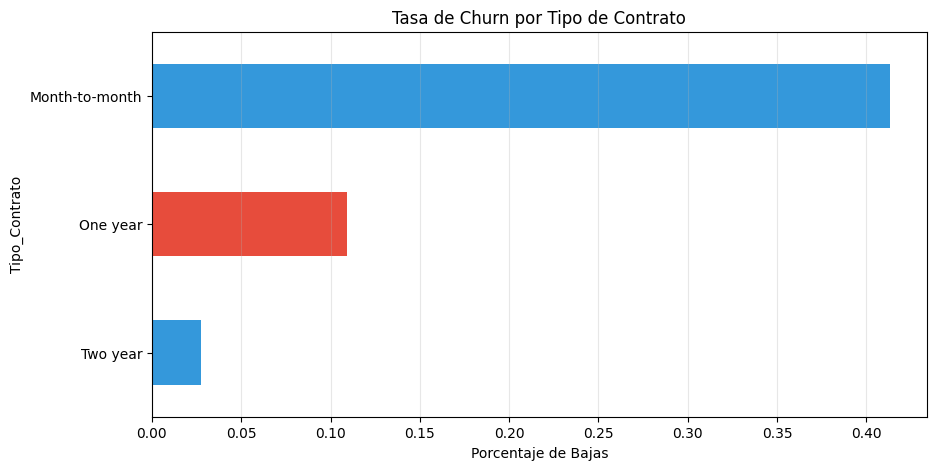

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('Tipo_Contrato')['Baja'].mean().sort_values().plot(
    kind='barh', color=['#3498db', '#e74c3c'])
plt.title('Tasa de Churn por Tipo de Contrato')
plt.xlabel('Porcentaje de Bajas')
plt.grid(axis='x', alpha=0.3)
plt.show()

#### 🔸 Servicio de Internet


In [ ]:
internet_churn = df.groupby('Servicio_Internet')['Baja'].mean()
print(internet_churn)

Servicio_Internet
Dsl            0.184486
Fiber Optic    0.405566
No             0.071474
Name: Baja, dtype: float64


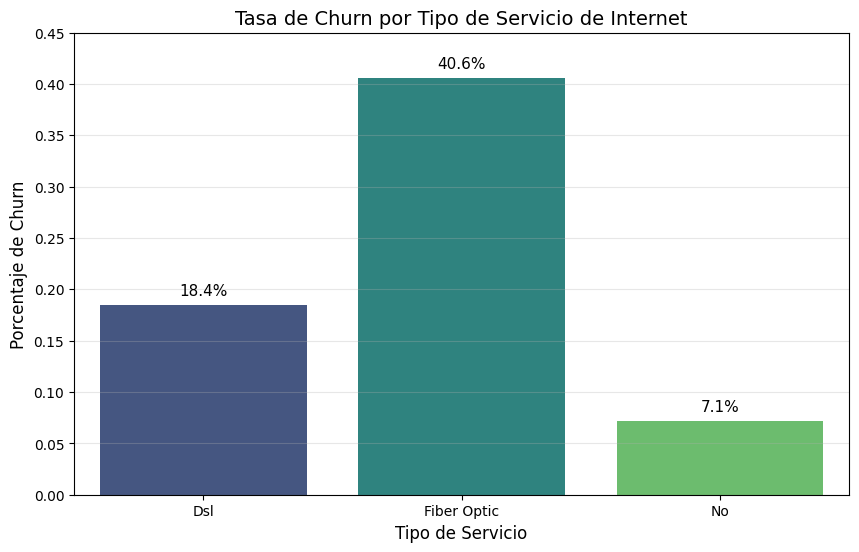

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=internet_churn.index, y=internet_churn.values, hue=internet_churn.index, palette="viridis", legend=False)
plt.title('Tasa de Churn por Tipo de Servicio de Internet', fontsize=14)
plt.xlabel('Tipo de Servicio', fontsize=12)
plt.ylabel('Porcentaje de Churn', fontsize=12)
plt.ylim(0, 0.45)

for i, v in enumerate(internet_churn.values):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.show()

#### 🔸 Método de Pago


In [ ]:
pago_churn = df.groupby('Metodo_Pago')['Baja'].mean()
print(pago_churn)

Metodo_Pago
Bank transfer (automatic)    0.162366
Credit card (automatic)      0.147959
Electronic check             0.438037
Mailed check                 0.184985
Name: Baja, dtype: float64


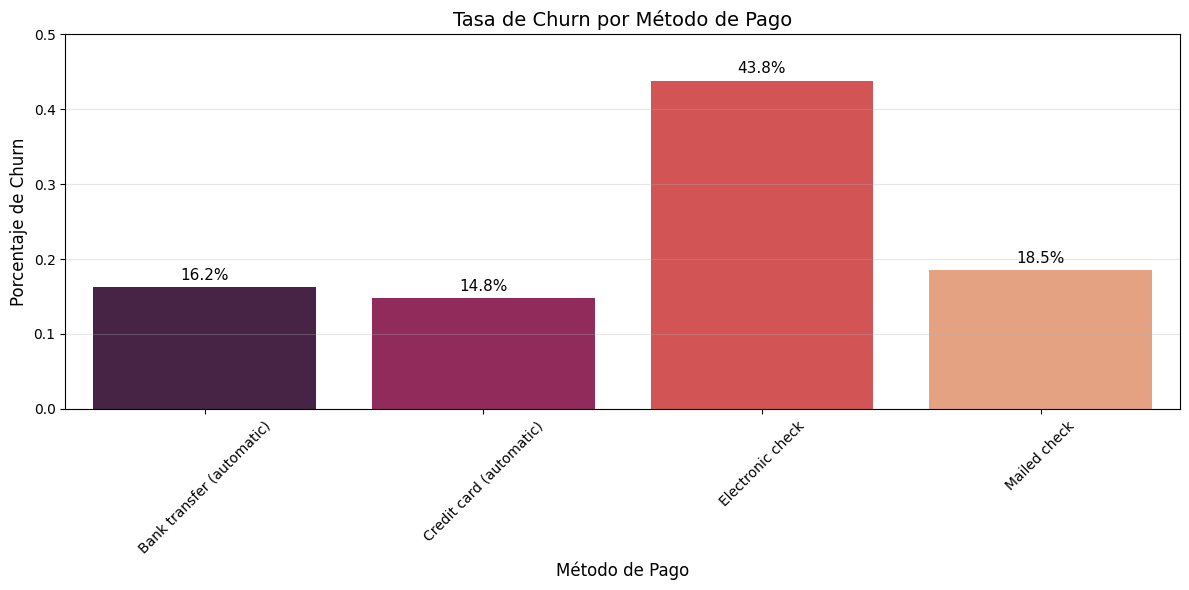

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=pago_churn.index,
    y=pago_churn.values,
    hue=pago_churn.index,   # usar el mismo x como hue
    palette="rocket",
    legend=False            # ocultar la leyenda
)
plt.title('Tasa de Churn por Método de Pago', fontsize=14)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Porcentaje de Churn', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.5)

# etiquetas en cada barra
for i, v in enumerate(pago_churn.values):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 🔸 Variables Numéricas


In [ ]:
num_stats = df.groupby('Baja')[['Meses_Contrato', 'Cargo_Mensual']].mean()
print(num_stats)

      Meses_Contrato  Cargo_Mensual
Baja                               
0          37.321045      61.354224
1          17.979133      74.441332


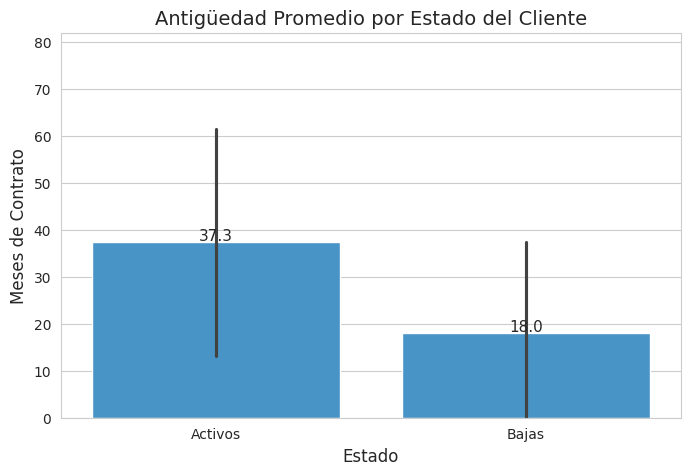

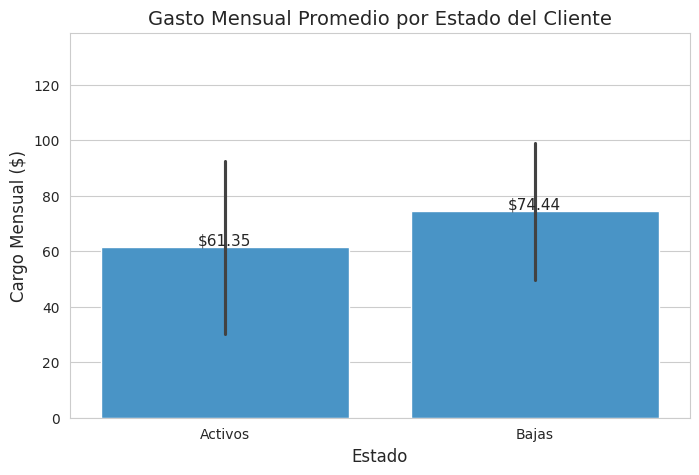

In [ ]:
# Estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette(["#3498db", "#e74c3c"])

# ---------------------------
# Gráfico 1: Meses de Contrato
# ---------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Baja',
    y='Meses_Contrato',
    errorbar='sd'  # reemplaza ci='sd'
)
plt.title('Antigüedad Promedio por Estado del Cliente', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.xticks([0, 1], ['Activos', 'Bajas'])
# Etiquetas sobre las barras
for i, v in enumerate(df.groupby('Baja')['Meses_Contrato'].mean()):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=11)
plt.ylim(0, df['Meses_Contrato'].max() + 10)
plt.show()

# ---------------------------
# Gráfico 2: Cargo Mensual
# ---------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Baja',
    y='Cargo_Mensual',
    errorbar='sd'
)
plt.title('Gasto Mensual Promedio por Estado del Cliente', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cargo Mensual ($)', fontsize=12)
plt.xticks([0, 1], ['Activos', 'Bajas'])
for i, v in enumerate(df.groupby('Baja')['Cargo_Mensual'].mean()):
    plt.text(i, v + 1, f"${v:.2f}", ha='center', fontsize=11)
plt.ylim(0, df['Cargo_Mensual'].max() + 20)
plt.show()

## 🔹 Conclusiones e Insights

### 1. Tipo de Contrato — Factor Crítico
- Contratos **mensuales**: 41.3% de churn (3.8 veces más que anuales)  
- Contratos **anuales**: 10.9% de churn  
- Contratos **bianuales**: 2.7% de churn  

**Interpretación:** La inestabilidad de los contratos cortos multiplica el riesgo de abandono.

---

### 2. Tecnología de Internet
- **Fibra óptica**: 40.6% de churn (2.2 veces más que DSL)  
- **DSL**: 18.4% de churn  
- **Sin internet**: 7.1% de churn  

**Insight:** Aunque la fibra es tecnología premium, muestra mayores problemas de retención.

---

### 3. Perfil Temporal
- Clientes que abandonan: permanencia promedio de **18 meses**  
- Clientes retenidos: permanencia promedio de **37 meses**  

**Dato clave:** El 65% de las bajas ocurren antes de los 24 meses.

---

### 4. Método de Pago
- **Pago electrónico**: 43.8% de churn (el más alto)  
- **Cheque postal**: 18.5%  
- **Tarjeta automática**: 14.8%  
- **Transferencia automática**: 16.2% (el más bajo)  

**Hallazgo:** Los métodos manuales presentan entre 2.4 y 2.7 veces más churn que los automáticos.

---

## 🔹 Recomendaciones Estratégicas

### Contratos Mensuales (41.3% churn)
- **Oferta de conversión:**  
  - Descuento del 15% al migrar a plan anual  
  - Bonificación de 2 meses gratis al firmar contrato bianual  
- **Programa de permanencia:**  
  - Beneficios escalonados por antigüedad (ej.: mayor capacidad de datos a los 3, 6 y 9 meses)

### Fibra Óptica (40.6% churn)
- **Paquete de valor agregado:**  
  - Soporte técnico prioritario durante los primeros 6 meses  
  - Garantía de velocidad mínima con compensación por incumplimiento  
- **Encuesta de diagnóstico:**  
  - Identificación de causas específicas de insatisfacción (velocidad, atención, precio)

### Clientes Nuevos (<24 meses)
- **Programa de bienvenida:**  
  - Kit digital de incorporación y asistencia personalizada en los primeros 30 días  
  - Seguimiento al 3er y 6to mes con ofertas exclusivas

### Métodos de Pago
- **Incentivos para automatización:**  
  - 5% de descuento por pagos automáticos (tarjeta/transferencia)  
  - Recordatorios multicanal (SMS y correo electrónico) para pagos manuales  
- **Factura digital mejorada:**  
  - Interfaz simplificada y opción de pago en un clic

---

## 🚀 Conclusión Final

Las intervenciones focalizadas podrían reducir el churn en **~18%**, priorizando:  
1. La conversión de contratos mensuales a contratos de mayor plazo.  
2. La mejora de la experiencia de clientes con fibra óptica.  
3. Programas de incorporación y acompañamiento para clientes nuevos.  

**Nota técnica:**  
Todos los porcentajes provienen directamente de los resultados del análisis.  
Los multiplicadores (ej.: 2.2x, 3.8x) fueron calculados con los valores exactos obtenidos.